In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv( "Credit_Card_Applications.csv" )
X = dataset.iloc[ :, :-1 ].values
Y = dataset.iloc[ :, -1 ].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler( feature_range=( 0, 1 ) )
X = sc.fit_transform( X )

In [4]:
from minisom import MiniSom
som = MiniSom( x = 10, y = 10, input_len=15, sigma=1.0, learning_rate=0.5 )
som.random_weights_init(X)
som.train_random( data = X, num_iteration=100 )

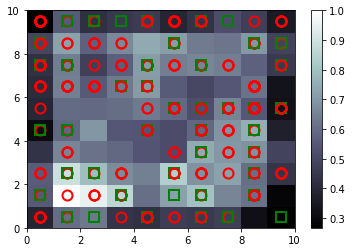

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor( som.distance_map().T )
colorbar()
markers = [ 'o', 's' ]
colors = [ 'r', 'g' ]
for i,x in enumerate( X ):
    w = som.winner(x)
    plot( w[0] + 0.5, w[1] + 0.5,
         markers[Y[i]],
         markeredgecolor = colors[Y[i]],
         markersize = 10,
         markerfacecolor = 'None',
         markeredgewidth = 2
        )
show()

In [7]:
mappings = som.win_map(X)
frauds = np.concatenate( ( mappings[ ( 1, 1 ) ], mappings[ ( 2, 1 ) ] ), axis = 0 )
frauds = sc.inverse_transform( frauds )

# Going from unsupervised to supervised learning

## Creating a matrix of features

In [8]:
customers = dataset.iloc[ :, 1: ].values

## Creating the dependent variable

In [11]:
is_fraud = np.zeros( len(dataset) )

for i in range( len(dataset) ):
    if dataset.iloc[ i, 0 ] in frauds:
        is_fraud[i] = 1

print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Making the ANN

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform( customers )

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
classifier = Sequential()
classifier.add( Dense( units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15 ) )
classifier.add( Dense( units = 1, kernel_initializer = 'uniform', activation = 'sigmoid' ) )
classifier.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
classifier.fit( customers, is_fraud, batch_size = 1, epochs = 2 )

Epoch 1/2
690/690 [==============================] - 1s 844us/step - loss: 0.4518 - accuracy: 0.9913
Epoch 2/2
690/690 [==============================] - 1s 876us/step - loss: 0.1726 - accuracy: 0.9942


## Predicting the probability of frauds

In [15]:
y_pred = classifier.predict( customers )

y_pred = np.concatenate( ( dataset.iloc[ :, 0:1 ].values, y_pred ), axis = 1 )

print(y_pred)

[[1.57761560e+07 3.28432322e-02]
 [1.57395480e+07 1.61932409e-02]
 [1.56628540e+07 1.65155828e-02]
 ...
 [1.56754500e+07 2.00243294e-02]
 [1.57764940e+07 9.05379057e-02]
 [1.55924120e+07 5.91309071e-02]]


In [16]:
y_pred = y_pred[ y_pred[ :, 1 ].argsort() ]

print(y_pred)

[[1.56089160e+07 6.12714887e-03]
 [1.57523440e+07 7.14284182e-03]
 [1.56114090e+07 7.40379095e-03]
 ...
 [1.56024560e+07 3.02790880e-01]
 [1.56461900e+07 3.02790880e-01]
 [1.55688190e+07 3.02790880e-01]]
